In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = '/content/drive/MyDrive/Jagung/'
!ls "/content/drive/MyDrive/Jagung/"

bahan  test  train  validation


In [3]:
bahan_dir = os.path.join(base_dir, 'bahan')
print(bahan_dir)
train_dir = os.path.join(base_dir, 'train')
print(train_dir)
val_dir = os.path.join(base_dir, 'validation')
print(val_dir)
test_dir = os.path.join(base_dir, 'test')
print(test_dir)

/content/drive/MyDrive/Jagung/bahan
/content/drive/MyDrive/Jagung/train
/content/drive/MyDrive/Jagung/validation
/content/drive/MyDrive/Jagung/test


In [4]:
blight_dir = os.path.join(bahan_dir, 'Blight')
common_rust_dir = os.path.join(bahan_dir, 'Common_Rust')
healthy_dir = os.path.join(bahan_dir, 'Healthy')
gray_leaf_spot_dir = os.path.join(bahan_dir, 'Gray_Leaf_Spot')

print("Jumlah dataset tiap kelas")
print('Jumlah gambar kulit blight :', len(os.listdir(blight_dir)))
print('Jumlah gambar kulit common rust :', len(os.listdir(common_rust_dir)))
print('Jumlah gambar kulit healthy :', len(os.listdir(healthy_dir)))
print('Jumlah gambar kulit gray leaf spot :', len(os.listdir(gray_leaf_spot_dir)))

Jumlah dataset tiap kelas
Jumlah gambar kulit blight : 1146
Jumlah gambar kulit common rust : 1306
Jumlah gambar kulit healthy : 1162
Jumlah gambar kulit gray leaf spot : 574


In [5]:
# Direktori isi train
train_blight_dir = os.path.join(train_dir, 'Blight/')
train_common_rust_dir = os.path.join(train_dir, 'Common_Rust/')
train_healthy_dir = os.path.join(train_dir, 'Healthy/')
train_gray_leaf_spot_dir = os.path.join(train_dir, 'Gray_Leaf_Spot/')

# Direktori isi validation
validation_blight_dir = os.path.join(train_dir, 'Blight/')
validation_common_rust_dir = os.path.join(train_dir, 'Common_Rust/')
validation_healthy_dir = os.path.join(train_dir, 'Healthy/')
validation_gray_leaf_spot_dir = os.path.join(train_dir, 'Gray_Leaf_Spot/')

#Direktori isi test
test_blight_dir = os.path.join(test_dir, 'Blight/')
test_common_rust_dir = os.path.join(test_dir, 'Common_Rust/')
test_healthy_dir = os.path.join(test_dir, 'Healthy/')
test_gray_leaf_spot_dir = os.path.join(test_dir, 'Gray_Leaf_Spot/')

In [6]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Fungsi untuk membagi dataset ke train, validation, dan test
def train_val_test_split_with_copy(source_dir, train_dir, val_dir, test_dir, train_ratio=0.8, val_ratio=0.1):
    files = [f for f in os.listdir(source_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    total_size = len(files)

    if total_size == 0:
        print(f"Direktori sumber '{source_dir}' kosong atau tidak mengandung gambar!")
        return

    train_size = int(total_size * train_ratio)
    val_size = int(total_size * val_ratio)
    test_size = total_size - (train_size + val_size)  # Pastikan semua gambar diproses

    random.shuffle(files)

    train_files = files[:train_size]
    val_files = files[train_size:train_size + val_size]
    test_files = files[train_size + val_size:]

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Menyalin file ke folder masing-masing
    for file in train_files:
        shutil.copy2(os.path.join(source_dir, file), os.path.join(train_dir, file))

    for file in val_files:
        shutil.copy2(os.path.join(source_dir, file), os.path.join(val_dir, file))

    for file in test_files:
        shutil.copy2(os.path.join(source_dir, file), os.path.join(test_dir, file))

# Path dataset
base_dir = '/content/drive/MyDrive/Jagung/bahan'
train_dir_base = '/content/drive/MyDrive/Jagung/train'
val_dir_base = '/content/drive/MyDrive/Jagung/validation'
test_dir_base = '/content/drive/MyDrive/Jagung/test'

train_ratio = 0.8
val_ratio = 0.1

# Kelas penyakit jagung
classes = ['Blight', 'Common_Rust', 'Healthy', 'Gray_Leaf_Spot']

# Pembagian dataset untuk setiap kelas
for class_name in classes:
    print(f"\n=== Memproses Kelas: {class_name} ===")
    train_val_test_split_with_copy(
        source_dir=os.path.join(base_dir, class_name),
        train_dir=os.path.join(train_dir_base, class_name),
        val_dir=os.path.join(val_dir_base, class_name),
        test_dir=os.path.join(test_dir_base, class_name),
        train_ratio=train_ratio,
        val_ratio=val_ratio
    )



=== Memproses Kelas: Blight ===

=== Memproses Kelas: Common_Rust ===

=== Memproses Kelas: Healthy ===

=== Memproses Kelas: Gray_Leaf_Spot ===


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Jagung/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Jagung/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Jagung/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5224 images belonging to 4 classes.
Found 3643 images belonging to 4 classes.
Found 3661 images belonging to 4 classes.


In [9]:
from tensorflow.keras.applications import EfficientNetB0, DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

IMG_HEIGHT = 150
IMG_WIDTH = 150

train_dir = '/content/drive/MyDrive/Jagung/train'
val_dir = '/content/drive/MyDrive/Jagung/validation'
test_dir = '/content/drive/MyDrive/Jagung/test'
num_classes = len(os.listdir(train_dir))

efficientnet = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

efficientnet.trainable = False
densenet.trainable = False

input_layer = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

efficientnet_features = efficientnet(input_layer)
efficientnet_features = GlobalAveragePooling2D()(efficientnet_features)

densenet_features = densenet(input_layer)
densenet_features = GlobalAveragePooling2D()(densenet_features)

concatenated = concatenate([efficientnet_features, densenet_features])

fc = Dense(1024, activation='relu')(concatenated)
fc = Dropout(0.3)(fc)
fc = Dense(512, activation='relu')(fc)
fc = Dropout(0.3)(fc)

output_layer = Dense(num_classes, activation='softmax')(fc)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb0            │ (None, 5, 5, 1280)     │      4,049,571 │ input_layer_2[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ densenet121 (Functional)  │ (None, 4, 4, 1024)     │      7,037,504 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 1280)           │              0 │ efficientnetb0[0][0]   │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 1024)           │              0 │ densenet121[0][0]      │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2304)           │              0 │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1024)           │      2,360,320 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 1024)           │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        524,800 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 512)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 4)              │          2,052 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 13,974,247 (53.31 MB)

 Trainable params: 2,887,172 (11.01 MB)

 Non-trainable params: 11,087,075 (42.29 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1686s 10s/step - accuracy: 0.6857 - loss: 0.8247 - val_accuracy: 0.8606 - val_loss: 0.3341
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1129s 7s/step - accuracy: 0.8369 - loss: 0.3882 - val_accuracy: 0.8778 - val_loss: 0.3059
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1044s 6s/step - accuracy: 0.8385 - loss: 0.3864 - val_accuracy: 0.8990 - val_loss: 0.2544
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1026s 6s/step - accuracy: 0.8498 - loss: 0.3519 - val_accuracy: 0.8806 - val_loss: 0.3331
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1081s 7s/step - accuracy: 0.8659 - loss: 0.3331 - val_accuracy: 0.9097 - val_loss: 0.2188
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1056s 6s/step - accuracy: 0.8781 - loss: 0.3067 - val_accuracy: 0.9009 - val_loss: 0.2506
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1028s 6s/step - accuracy: 0.8740 - loss: 0.3045 - val_accuracy: 0.9086 - val_loss: 0.2055
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1047s 6s/step - accuracy: 0.8811 - loss: 0.2895 -

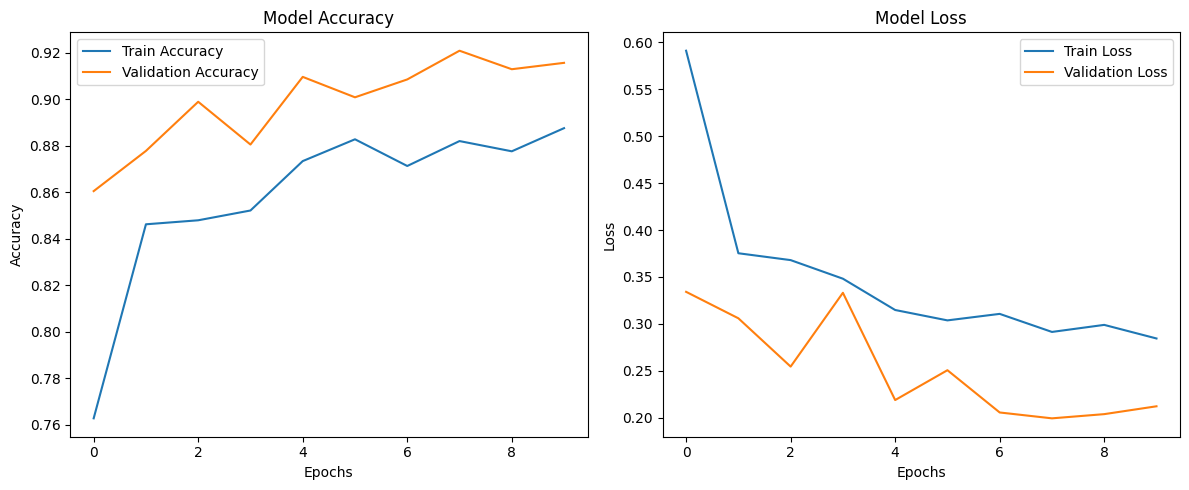

In [10]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weights,
    verbose=1
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history.get('accuracy', history.history.get('categorical_accuracy')), label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

115/115 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step


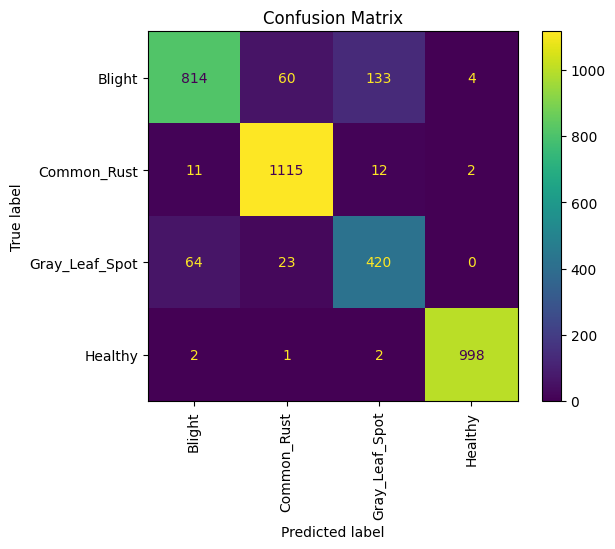

Classification Report:
                precision    recall  f1-score   support

        Blight       0.91      0.81      0.86      1011
   Common_Rust       0.93      0.98      0.95      1140
Gray_Leaf_Spot       0.74      0.83      0.78       507
       Healthy       0.99      1.00      0.99      1003

      accuracy                           0.91      3661
     macro avg       0.89      0.90      0.90      3661
  weighted avg       0.92      0.91      0.91      3661



In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))


Saving Corn_Common_Rust (1).jpg to Corn_Common_Rust (1).jpg


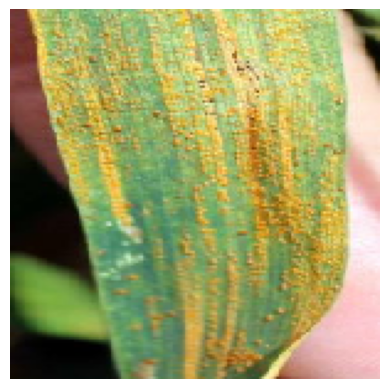

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
File: Corn_Common_Rust (1).jpg
This image belongs to class: Common_Rust


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import os

# Upload gambar menggunakan Google Colab
uploaded = files.upload()

# Iterasi melalui gambar yang diunggah
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))  # Mengubah ukuran gambar sesuai dengan input model
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocessing gambar
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0  # Normalisasi seperti pada data pelatihan

    # Prediksi kelas gambar
    images = np.vstack([x])
    classes = model.predict(images, batch_size=1)

    # Mendapatkan daftar nama kelas dari direktori pelatihan
    class_list = sorted(os.listdir('/content/drive/MyDrive/Jagung/train'))  # Pastikan menggunakan sorted agar indeks sesuai

    # Menentukan kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(classes[0])  # Index kelas dengan probabilitas tertinggi
    predicted_class_name = class_list[predicted_class_index]  # Nama kelas yang diprediksi

    print(f"File: {fn}")
    print(f"This image belongs to class: {predicted_class_name}")
